In [1]:
import os
os.chdir('..')

In [102]:
import numpy as np
import scipy as sp
import datajoint as dj
import matplotlib.pyplot as plt

In [104]:
from pipeline import lab, experiment, tracking, ephys, psth
from pipeline import plot
from pipeline.plot import behavior_plot, unit_characteristic_plot

# Top level ***ephys*** diagram

In [37]:
ephys_erd = ((dj.ERD(ephys.Unit)-2) + dj.ERD(ephys.TrialSpikes)
             + (dj.ERD(experiment.BrainLocation)-1)
             + dj.ERD(ephys.ProbeInsertion.InsertionLocation)
             + dj.ERD(psth.UnitSelectivity) + (dj.ERD(psth.PeriodSelectivity) - 1))

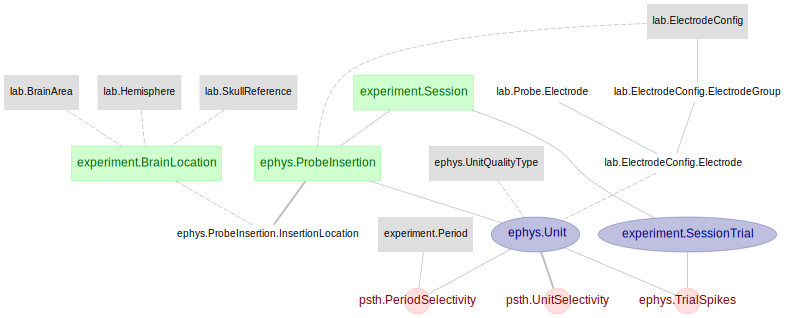

In [38]:
ephys_erd

# Top level ***behavior*** diagram

In [32]:
behav_erd = (dj.ERD(experiment.SessionTrial) - 1 
             + (dj.ERD(experiment.BrainLocation)-1) 
             + (dj.ERD(experiment.BehaviorTrial) + 1 - 1) 
             + (dj.ERD(experiment.PhotostimTrial) + 1 - 1)) 

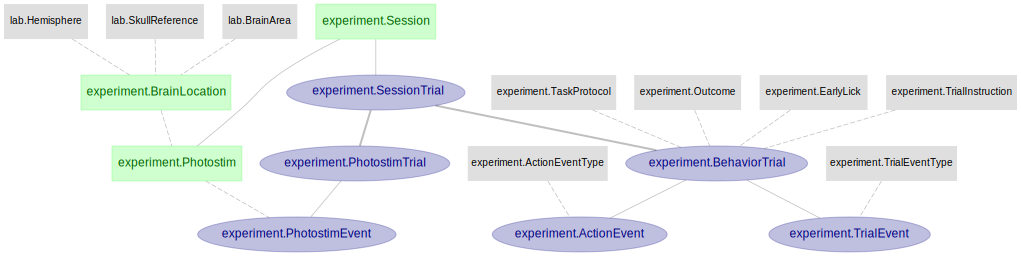

In [33]:
behav_erd

# Browsing of subjects

In [40]:
lab.Subject()

subject_id institution 6 digit animal ID,username,cage_number institution 6 digit animal ID,date_of_birth format: yyyy-mm-dd,sex,animal_source
123457,daveliu,145375,2017-08-03,M,Jackson labs
397853,daveliu,144545,2017-07-15,M,Allen Institute
399752,daveliu,145375,2017-08-03,M,Jackson labs
400480,daveliu,145700,2017-08-09,M,Allen Institute
406680,daveliu,148859,2017-10-06,F,Jackson labs
407512,daveliu,151629,2017-10-13,M,Jackson labs
407513,daveliu,148636,2017-10-13,M,Jackson labs


### Query one subject

In [44]:
# restrict by string
lab.Subject & 'subject_id=397853'

subject_id institution 6 digit animal ID,username,cage_number institution 6 digit animal ID,date_of_birth format: yyyy-mm-dd,sex,animal_source
397853,daveliu,144545,2017-07-15,M,Allen Institute


In [43]:
# restrict by dictionary
lab.Subject & {'subject_id': 397853}

subject_id institution 6 digit animal ID,username,cage_number institution 6 digit animal ID,date_of_birth format: yyyy-mm-dd,sex,animal_source
397853,daveliu,144545,2017-07-15,M,Allen Institute


In [48]:
lab.Subject & {'sex': 'm'}

subject_id institution 6 digit animal ID,username,cage_number institution 6 digit animal ID,date_of_birth format: yyyy-mm-dd,sex,animal_source
123457,daveliu,145375,2017-08-03,M,Jackson labs
397853,daveliu,144545,2017-07-15,M,Allen Institute
399752,daveliu,145375,2017-08-03,M,Jackson labs
400480,daveliu,145700,2017-08-09,M,Allen Institute
407512,daveliu,151629,2017-10-13,M,Jackson labs
407513,daveliu,148636,2017-10-13,M,Jackson labs
412330,daveliu,154522,2017-12-05,M,Jackson labs


### Fetch back the subject key

In [51]:
subj_397853 = (lab.Subject & {'subject_id': 397853}).fetch1('KEY')  # "fetch1()" because we know there's only one

In [52]:
subj_397853

{'subject_id': 397853}

In [49]:
male_subjs = (lab.Subject & {'sex': 'm'}).fetch('KEY')  # "fetch()" for fetching multiple

In [50]:
male_subjs

[{'subject_id': 123457},
 {'subject_id': 397853},
 {'subject_id': 399752},
 {'subject_id': 400480},
 {'subject_id': 407512},
 {'subject_id': 407513},
 {'subject_id': 412330},
 {'subject_id': 432998},
 {'subject_id': 435884}]

# Browsing of sessions

In [79]:
# Get sessions with units
sessions = experiment.Session & ephys.Unit
sessions

subject_id institution 6 digit animal ID,session session number,session_date,username,rig
435884,1,2018-12-07,daveliu,RRig


In [81]:
# List all sessions and the ProbeInsertion counts for each
sessions = sessions.aggr(ephys.ProbeInsertion, probe_insert_count='count(*)')
sessions

subject_id institution 6 digit animal ID,session session number,probe_insert_count calculated attribute
435884,1,1


In [82]:
# query 1 session
experiment.Session & {'session': 1, 'subject_id': 435884}

subject_id institution 6 digit animal ID,session session number,session_date,username,rig
435884,1,2018-12-07,daveliu,RRig


In [87]:
# get session key
session_key = (experiment.Session & {'session': 1, 'subject_id': 435884}).fetch1('KEY')

# Browsing of units for this session
#### Keep in mind that units may come from different ***ProbeInsertion***

In [65]:
unit_erd = (dj.ERD(ephys.Unit) - 1) + (dj.ERD(ephys.Unit) + 1)

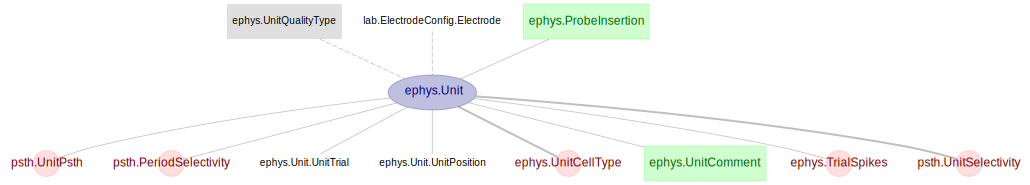

In [66]:
unit_erd

In [88]:
ephys.Unit & session_key

subject_id institution 6 digit animal ID,session session number,insertion_number,unit,unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_id hash of the group and group_member (ensure uniqueness),electrode_group electrode group,electrode electrode,unit_posx (um) x position of the unit on the probe,unit_posy (um) y position of the unit on the probe,spike_times (s),unit_amp,unit_snr,waveform average spike waveform
435884,1,1,1,1,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,6,42.4544792175293,33.699256896972656,=BLOB=,294.20157,13.780584,=BLOB=
435884,1,1,2,2,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,4,29.585512161254883,14.670790672302246,=BLOB=,344.143,16.491089,=BLOB=
435884,1,1,3,3,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,5,16.062057495117188,38.767662048339844,=BLOB=,287.36014,10.473887,=BLOB=
435884,1,1,4,4,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,5,15.020341873168945,43.26382827758789,=BLOB=,154.78827,7.615032,=BLOB=
435884,1,1,5,5,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,5,14.338550567626953,38.978546142578125,=BLOB=,157.83987,7.869556,=BLOB=
435884,1,1,6,6,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,6,40.072269439697266,45.23943328857422,=BLOB=,161.41177,7.1355534,=BLOB=
435884,1,1,7,7,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,7,1.4678318500518799,61.98297882080078,=BLOB=,215.175,12.520164,=BLOB=


In [89]:
good_units = ephys.Unit & session_key & {'unit_quality': 'good'}
good_units

subject_id institution 6 digit animal ID,session session number,insertion_number,unit,unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_id hash of the group and group_member (ensure uniqueness),electrode_group electrode group,electrode electrode,unit_posx (um) x position of the unit on the probe,unit_posy (um) y position of the unit on the probe,spike_times (s),unit_amp,unit_snr,waveform average spike waveform
435884,1,1,1,1,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,6,42.4544792175293,33.699256896972656,=BLOB=,294.20157,13.780584,=BLOB=
435884,1,1,5,5,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,5,14.338550567626953,38.978546142578125,=BLOB=,157.83987,7.869556,=BLOB=
435884,1,1,10,10,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,10,44.27643966674805,79.20182800292969,=BLOB=,275.46558,13.48085,=BLOB=
435884,1,1,11,11,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,10,45.542633056640625,80.29844665527344,=BLOB=,117.8578,6.137078,=BLOB=
435884,1,1,15,15,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,12,31.08588409423828,98.89152526855469,=BLOB=,242.60864,14.416281,=BLOB=
435884,1,1,18,18,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,18,45.05342483520508,159.88873291015625,=BLOB=,142.01253,8.705505,=BLOB=
435884,1,1,21,21,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,22,46.288734436035156,199.1356201171875,=BLOB=,411.5883,19.068323,=BLOB=


## Unit selectivity

In [90]:
psth.UnitSelectivity & good_units

subject_id institution 6 digit animal ID,session session number,insertion_number,unit,unit_selectivity
435884,1,1,5,ipsi-selective
435884,1,1,10,contra-selective
435884,1,1,11,ipsi-selective
435884,1,1,18,ipsi-selective
435884,1,1,21,ipsi-selective
435884,1,1,26,ipsi-selective
435884,1,1,27,contra-selective


### Pick one unit

In [91]:
unit_key = (psth.UnitSelectivity & good_units & 'unit=5').fetch1('KEY')
unit_key                                                                 

{'subject_id': 435884, 'session': 1, 'insertion_number': 1, 'unit': 5}

### Unit PSTH

In [95]:
upsth_erd = (dj.ERD(psth.UnitPsth) - 1)

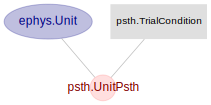

In [96]:
upsth_erd

In [94]:
psth.TrialCondition()

trial_condition_id hash of trial_condition_arg,trial_condition_desc trial condition description,trial_condition_func trial retrieval function,trial_condition_arg trial retrieval arguments
094a9e6c76743a6f4c3b35d3d0a52e18,all_noearlylick_both_alm_stim_right,_get_trials_include_stim,=BLOB=
15c1c37ee0d10f18e265f6d7f3cf9fbf,all_noearlylick_both_alm_nostim,_get_trials_exclude_stim,=BLOB=
32137a71307c5975926cced9cea23cce,all_noearlylick_both_alm_nostim_left,_get_trials_exclude_stim,=BLOB=
42bb9a19b2b308454762247e4c3bd863,good_noearlylick_hit,_get_trials_exclude_stim,=BLOB=
4e82458dbf4e7ca2e9582d658fea8a1c,all_noearlylick_both_alm_stim,_get_trials_include_stim,=BLOB=
90a437e5aa48baa8b16920c6ee0d67a6,good_noearlylick_left_miss,_get_trials_exclude_stim,=BLOB=
ace70cc388c9413d9b0541c512bdaf03,good_noearlylick_right_hit,_get_trials_exclude_stim,=BLOB=


In [98]:
unit_psth = psth.UnitPsth * psth.TrialCondition & unit_key & 'trial_condition_desc = "good_noearlylick_hit"'

In [100]:
psth, edges = unit_psth.fetch1('unit_psth')

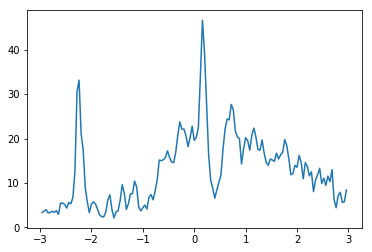

In [103]:
plt.plot(edges[1:], psth)

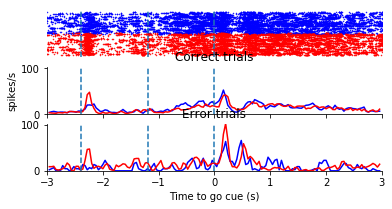

In [113]:
plot.unit_psth(unit_key)